# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

### Домашнее задание №2. Математическая оптимизация

Задание выполнил(а):

    Афенкова Вероника

### Общая информация

__Дата выдачи:__ 11.06.2024

__Дедлайн:__ 04:00 18.06.2024

### Оценивание и штрафы

Количество баллов за каждую задачу данного домашнего задания указано рядом с условием задачи.

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s \times 10/34 ,
$$

где $s$  — количество баллов, которое вы набрали в сумме по всем задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

Кроме того, не забывайте, что все решения прогоняются через специальную новую систему антиплагиата для юпитеровских ноутбуков, которая детектирует перекрестные «похожести» между разными ноутбуками, а также решения, сгенерированные нейросетью. Подобные работы также в обязательном порядке будут расцениваться исключительно как плагиат.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграмм-канале.

### О задании

В данном задании мы потренируемся в работе с математическим анализом и методами математической оптимизации, чёткое понимание которых совершенно необходимо в рамках любой задачи и для любой модели в машинном обучении.

В первой части задания мы будем с вами работать со следующей функцией:

$$y(x) = x^{3} \ln(x)$$

### Задание 1


#### 1.1. (1 балл)

Посчитайте производную данной функции аналитически. Для этого либо воспользуйтесь листком бумаги и прикрепите сюда фотографию, либо используйте язык разметки LaTeX — он поддерживается в юпитеровских ноутбуках.

$$y'=3x^{2} \times ln(x)+x^{3} \times 1/x=3x^{2}ln(x)+x^{2}$$

Здесь пользуемся формулой производной произведения двух функций: $$(A \times B)' = A' \times B + A \times B'$$

#### 1.2. (2 балла)

Напишите программную функцию `f(x)`, которая бы вычисляла значение нашей функции в точке и возвращала бы это значение в качестве ответа; и напишите программную функцию `df(x)`, которая бы вычисляла значение производной нашей функции в точке и возвращала бы это значение в качестве ответа.

Обязательно сделайте проверку всех функций на какой-нибудь конкретной точке. Убедитесь, что ответы вашего предыдущего пункта (на листочке) и программного в этом плане полностью совпадают.

In [1]:
import numpy as np

In [76]:
def f(x):
    return x**3 * np.log(x)

def df(x):
    return 3*x**2*np.log(x) + x**2

В качестве примера возьмем точку x = e, чтобы было удобно считать логарифм. Тогда для f(x) должно получиться значение e^3, что примерно равно 20.085 а для df(x) - 4e^2, что примерно равно 29.556. Проверим это на наших функциях:

In [3]:
print(f(np.e))
print(df(np.e))

20.085536923187664
29.556224395722598


Как видим, функции работают корректно!

#### 1.3. (2 балла)

Визуализируйте нашу функцию (постройте график).

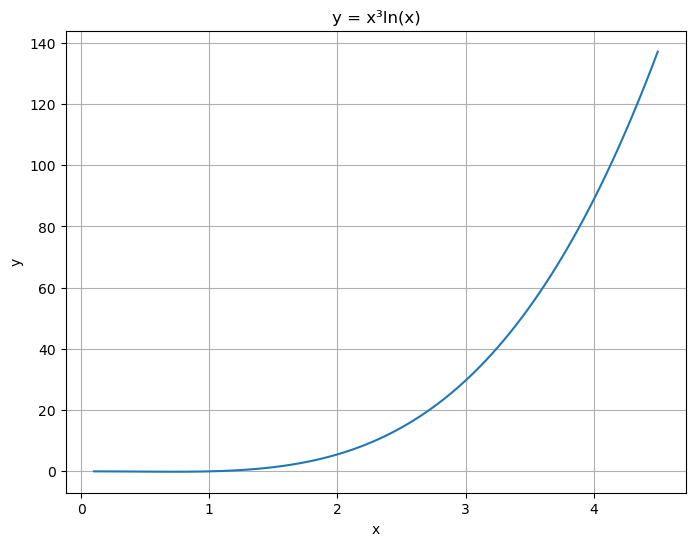

In [14]:
import matplotlib.pyplot as plt

x = np.linspace(0.1, 4.5, 100)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x³ln(x)')
plt.grid()
plt.show()

### Задание 2

#### 2.1. (4 балла)

Реализуйте функцию `get_min_with_gd`, которая принимает на вход начальную точку $x_0$, число шагов, `lr` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска; и возвращает последовательность точек, полученных на каждом шаге.

In [24]:
def get_min_with_gd(x0, steps, lr, threshold):
    pts = [x0]
    x = x0
    for _ in range(steps):
        gr = df(x)
        if np.abs(gr) < threshold:
            break
        x = x - lr * gr
        pts.append(x)
    return pts

#### 2.2. (2 балла)

Запустите поиск минимума с нескольких любых точек (не менее 3).

Проверьте, что все работает ожидаемым образом, отрисовав график изменения координаты точки, в зависимости от итерации градиентного спуска, для каждого запуска.

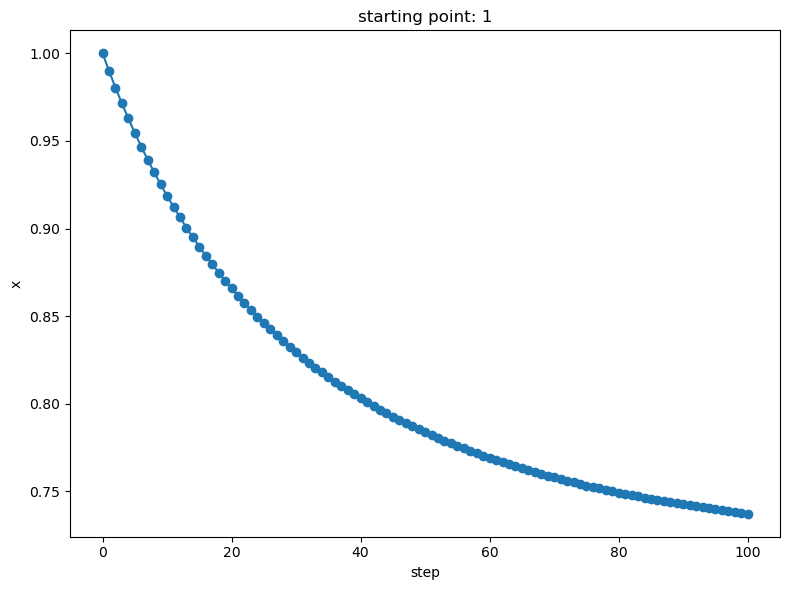

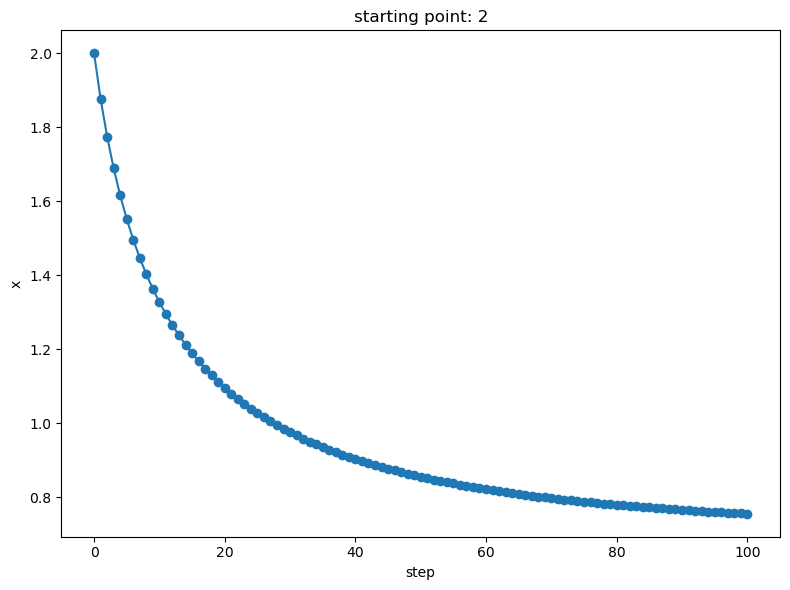

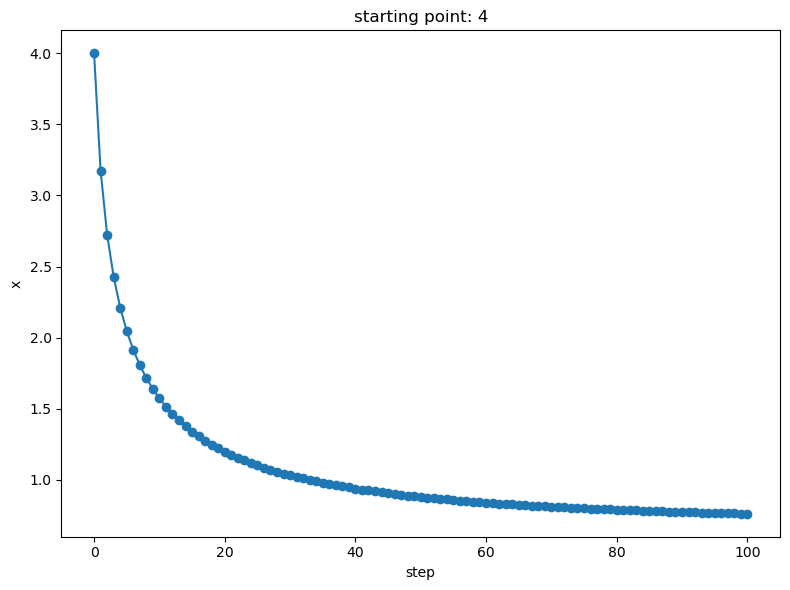

In [88]:
start = [1, 2, 4]
steps = 100
lr = 0.01
threshold = 1e-6

for i, x0 in enumerate(start):
    pts = get_min_with_gd(x0, steps, lr, threshold)
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(pts)), pts, marker='o')
    plt.title(f'starting point: {x0}')
    plt.xlabel('step')
    plt.ylabel('x')
    plt.tight_layout()
    plt.show()

#### 2.3. (3 балла)

Отрисуйте график самой функции еще раз. На данный график нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Нанесите на график истинный минимум отдельной точкой и подпишите его (в виде текста на графике).

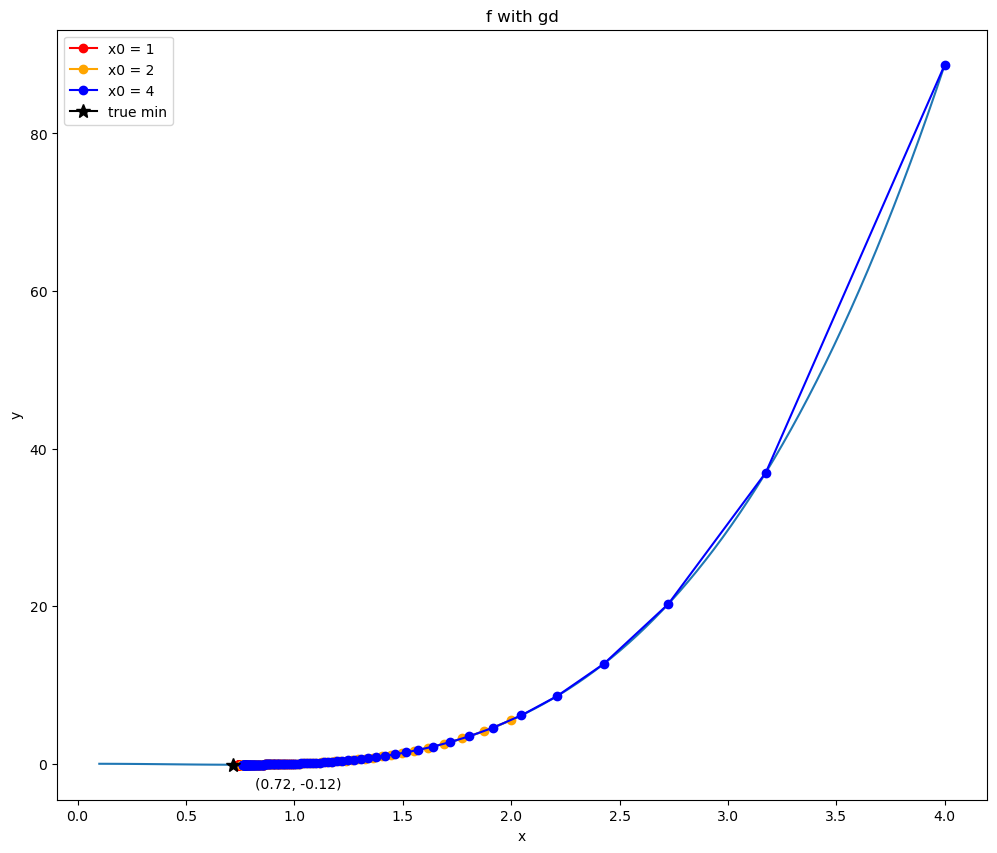

In [91]:
x_min = get_min_with_gd(4, 1000, lr, threshold)[-1]
y_min = f(x_min)
x = np.linspace(0.1, 4, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(x, y)

for x0, color in zip(start, ['red', 'orange', 'blue']):
    pts = get_min_with_gd(x0, steps, lr, threshold)
    ax.plot(pts, [f(x) for x in pts], marker='o', color=color, label=f'x0 = {x0}')

ax.plot(x_min, y_min, marker='*', color='black', markersize=10, label='true min')
ax.text(x_min+0.1, y_min-3, f'({x_min:.2f}, {y_min:.2f})')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f with gd')
ax.legend()
plt.show()

Для начальных точек 1 и 2 очень плохо виден алгоритм, но если приглядеться, то можно разглядеть красные и оранжевые точки.

### Задание 3

Начиная с задания 3, мы будем работать с другими функциями.

Пусть

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5\cdot e ^{-y}))$$

#### 3.1. (1 балл и 2 бонусных балла)

Верно ли, что $f$ имеет единственную точку локального минимума, причем этот локальный минимум также является и глобальным? Почему да или почему нет? Докажите ваш ответ!

*Примечание. В данном задании графическое доказательство оценивается в 1 балл; строгое математическое доказательство оценивается в 2 бонусных балла.*

Графическое док-во:

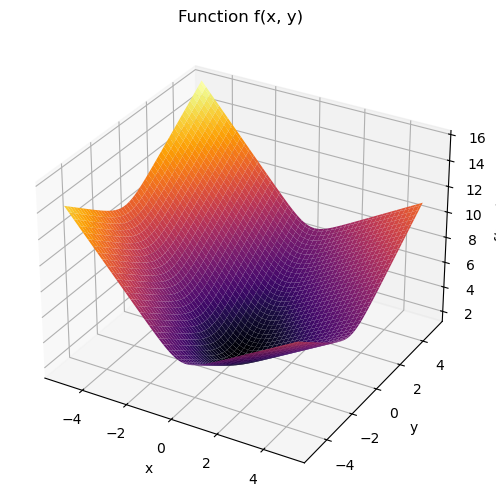

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.log((np.exp(x) + np.exp(-2*x)) * (np.exp(y+1) + 0.5*np.exp(-y)))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Function f(x, y)')
plt.show()

По графику видно, что у данной функции лишь одно "дно", то есть локальный минимум, который единственный, а следовательно и глобальный тоже.

Чтобы доказать, что наша функция имеет единственный глобальный минимум, мы будем использовать следующий подход:

Найдем все критические точки функции, то есть точки, где градиент функции равен нулю.
Исследуем характер каждой критической точки (минимум, максимум или седловая точка) с помощью матрицы Гессе.
Проанализируем поведение функции на бесконечности, чтобы убедиться, что функция стремится к бесконечности во всех направлениях.

Градиент функции $f(x, y)$:
$\nabla f(x, y) = \left(\frac{e^x - 2e^{-2x}}{e^x + e^{-2x}}, \frac{e^{y+1} - 0.5e^{-y}}{e^{y+1} + 0.5e^{-y}}\right)$

Приравниваем каждую компоненту градиента к нулю и решаем уравнения:

$\frac{e^x - 2e^{-2x}}{e^x + e^{-2x}} = 0 \Rightarrow e^x - 2e^{-2x} = 0 \Rightarrow e^{3x} = 2 \Rightarrow x = \frac{1}{3}\ln(2)$;

$\frac{e^{y+1} - 0.5e^{-y}}{e^{y+1} + 0.5e^{-y}} = 0 \Rightarrow e^{y+1} - 0.5e^{-y} = 0 \Rightarrow 2e^{2y+1} = 1 \Rightarrow y = -\frac{1}{2}\ln(2) - 1$.

Итак, единственная критическая точка: $(\frac{1}{3}\ln(2), -\frac{1}{2}\ln(2) - 1)$.

Матрица Гессе функции $f(x, y)$:

$H(x, y) = \begin{bmatrix}
\frac{4e^{-2x} - e^x}{e^x + e^{-2x}} + \left(\frac{e^x - 2e^{-2x}}{e^x + e^{-2x}}\right)^2 & 0 \
0 & \frac{0.5e^{-y} + e^{y+1}}{0.5e^{-y} + e^{y+1}} - \left(\frac{e^{y+1} - 0.5e^{-y}}{0.5e^{-y} + e^{y+1}}\right)^2
\end{bmatrix}$

Не понимаю, почему матрица тут не отрисовывается((

Вычислим значения элементов матрицы Гессе в критической точке $(\frac{1}{3}\ln(2), -\frac{1}{2}\ln(2) - 1)$:

$H_{11} = \frac{4e^{-2x} - e^x}{e^x + e^{-2x}} + \left(\frac{e^x - 2e^{-2x}}{e^x + e^{-2x}}\right)^2 = \frac{4 \cdot 2^{-2/3} - 2^{1/3}}{2^{1/3} + 2^{-2/3}} + \left(\frac{2^{1/3} - 2 \cdot 2^{-2/3}}{2^{1/3} + 2^{-2/3}}\right)^2 \approx 0.4479 > 0$

$H_{22} = \frac{0.5e^{-y} + e^{y+1}}{0.5e^{-y} + e^{y+1}} - \left(\frac{e^{y+1} - 0.5e^{-y}}{0.5e^{-y} + e^{y+1}}\right)^2 = \frac{0.5 \cdot 2^{1/2} + 2^{-1/2}}{0.5 \cdot 2^{1/2} + 2^{-1/2}} - \left(\frac{2^{-1/2} - 0.5 \cdot 2^{1/2}}{0.5 \cdot 2^{1/2} + 2^{-1/2}}\right)^2 \approx 0.4479 > 0$

Матрица Гессе в критической точке:

$H(\frac{1}{3}\ln(2), -\frac{1}{2}\ln(2) - 1) \approx \begin{bmatrix}
0.4479 & 0 \
0 & 0.4479
\end{bmatrix}$

Эта матрица является диагональной с положительными элементами на диагонали, следовательно, она положительно определена. Таким образом, критическая точка $(\frac{1}{3}\ln(2), -\frac{1}{2}\ln(2) - 1)$ является строгим локальным минимумом.

Рассмотрим пределы функции $f(x, y)$, когда $x$ и $y$ стремятся к бесконечности. Тут и так нетрудно догадаться, что во всех направлениях функция будет стремиться к бесконечности (ну и наглядно нам это показывает отрисованный выше график), то есть наша точка - единственный строгий локальный минимум, а значит и глобальный.

#### 3.2. (3 балла и 2 бонусных балла)

Придумайте какие-нибудь функции $g$ и $h$ от двух переменных, такие что
- функция $g$ не имеет глобального минимума (не ограничена снизу);
- функция $h$ имеет по крайней мере два локальных минимума, неравных друг другу.

Докажите, что ваши функции удовлетворяют заявленным критериям.

*Примечание. В данном задании графическое доказательство оценивается в рамках основных баллов; строгое математическое доказательство оценивается в 2 бонусных балла.*

In [92]:
def g(x, y):
    return x**2 - y**2

def h(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

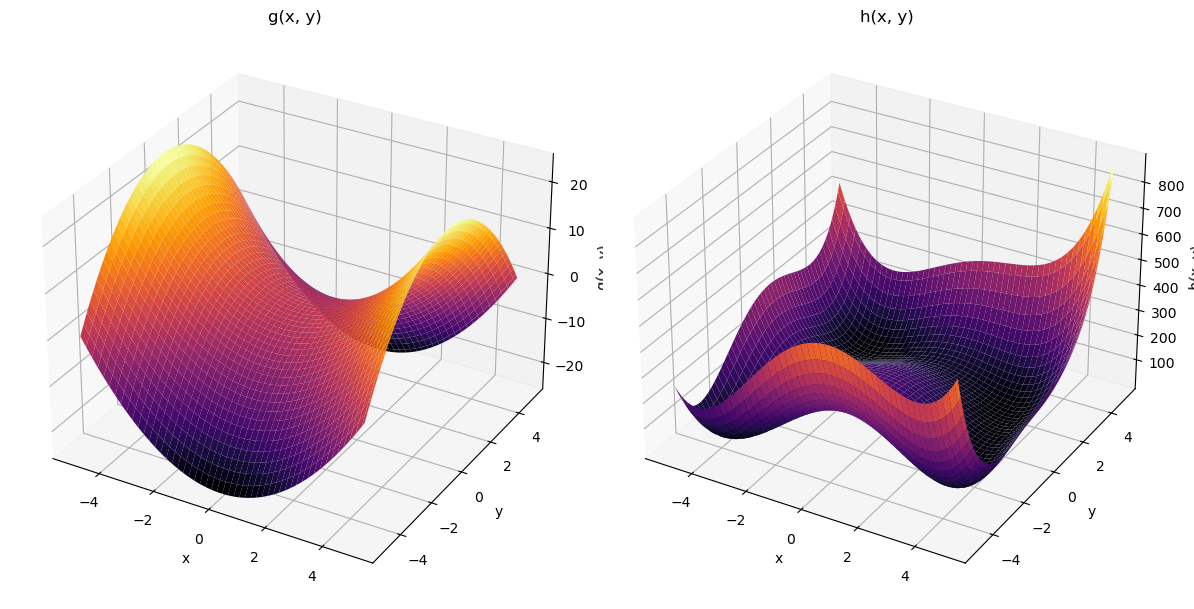

In [98]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, g(X, Y), cmap='inferno')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('g(x, y)')
ax1.set_title('g(x, y)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, h(X, Y), cmap='inferno')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('h(x, y)')
ax2.set_title('h(x, y)')

plt.tight_layout()
plt.show()

Мат. доказательство: Функция g(x, y) = x² - y² не ограничена снизу, так как при x = 0 и y → ∞ значение функции стремится к -∞.

Функция h(x, y) = (x² + y - 11)² + (x + y² - 7)² имеет четыре локальных минимума в точках (3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186), (3.584428, -1.848126), что видно из графика.

#### 3.3. (5 баллов)

Реализуйте функцию `get_min_with_rmsprop`, которая принимает на вход начальную точку $x_0$, число шагов, `lr`, `beta` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска с модификацией RMSProp; и возвращает последовательность точек, полученных на каждом шаге.

Напомним, как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ — learning rate, $ɛ$ — малое число (можно взять 0.0001 — оно нужно, чтобы случайно не было деления на 0), $\beta$ — мера учета инерции.



In [99]:
def get_min_with_rmsprop(f, df, x0, steps, lr, beta, threshold, eps=1e-8):
    pts = [x0]
    x = x0
    gm = np.zeros_like(x)
    for _ in range(steps):
        grad = df(x[0], x[1])
        gm = (1 - beta) * gm + beta * grad**2
        x -= lr * grad / (np.sqrt(gm) + eps)
        pts.append(x.copy())
        if np.linalg.norm(grad) < threshold:
            break

    return pts

#### 3.4. (4 балла)

Запустите поиск минимума для всех трёх функций ($f$, $g$, $h$) с нескольких любых точек (не менее 3 — таким образом, минимум 9 запусков).

Проверьте, что все работает ожидаемым образом, отрисовав для каждого запуска график изменения координат точки (2D-график) по мере прохождения градиентного спуск. Все графики строятся на трёх парах осей, размещенных вертикально на одном полотне (свои оси для каждой функции; разные запуски для одной функции изображаются на одних осях).

/var/folders/1g/q2_gty5x7gx9s3rnz09cfm3w0000gp/T/ipykernel_81292/815371759.py:5: RuntimeWarning: invalid value encountered in log
  return 3*x**2*np.log(x) + x**2


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

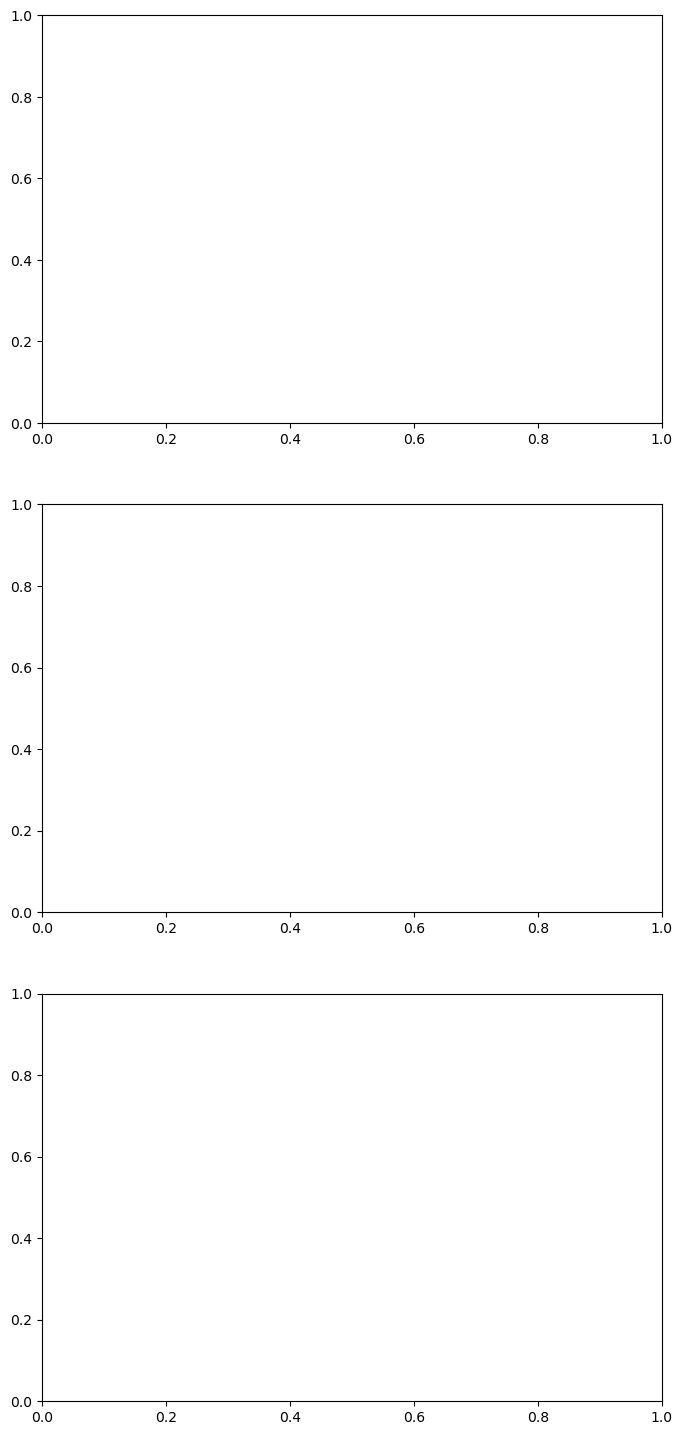

#### 3.5. (3 балла)

Отрисуйте графики самих функций еще раз. На данные графики нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Там, где они есть у функции, нанесите на графики истинные локальные минимумы функций в виде отдельных точек, а также подпишите их в виде текста на графике. Все графики строятся на трёх множествах осей, размещенных вертикально на одном полотне — свои оси для каждой функции.

In [ ]:
# Ваш код здесь

### Задание 4

#### Масштабирование на многомерный случай (4 балла)

Удостоверьтесь в том, что ваша функция `get_min_with_rmsprop` из прошлого задания работает не только с функциями от двух переменных, но и с функциями от произвольного числа переменных. При необходимости внесите в функцию корректировки ниже.

Придумайте любую функцию от 5 переменных, у которой есть какой-нибудь минимум (например, самое простое, точка $(0, 0, 0, 0, 0)$) и запустите градиентный спуск с RMSProp для этой функции. Проверьте, что градиентный спуск действительно сходится в правильную точку экстремума.

In [ ]:
# Ваш код здесь